# Inductive Miner (Infrequent) Prototyping

### Inductive Miner - Base

In [75]:
%reload_ext autoreload
%autoreload 2

from practical.ProcessMining.group1.task3.inductiveminer import InductiveMiner
from practical.ProcessMining.group1.task3.inductiveminer_infrequent import InductiveMinerInfrequent
from practical.ProcessMining.group1.shared.utils import read_txt_test_logs

def run(log):
  miner = InductiveMiner(log)
  miner.run()
  print(miner)
  miner.visualize_process_tree()

def run_infrequent(log):
  miner = InductiveMinerInfrequent(log)
  miner.run()
  print(miner)
  miner.visualize_process_tree()
  
def run_debug(log):
  miner = InductiveMiner(log)
  miner.run()
  print(miner)
  miner.visualize_process_tree()

Sequence Logs

→(a, b, c, d, e, f, g)


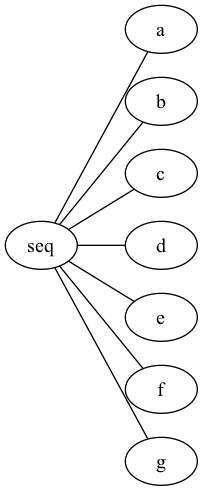

In [76]:
log = [('a', 'b', 'c', 'd', 'e', 'f', 'g')]
run(log)

XOR Logs

×(→(a, c, ×(i, j)), →(d, e, ×(k, 𝜏), h, ×(f, 𝜏)))


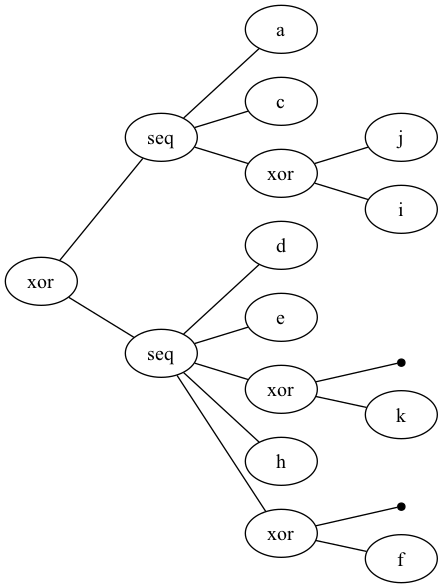

In [77]:
log = [('a', 'c', 'i'), ('d', 'e', 'k' ,'h'), ('a', 'c', 'j'), ('d', 'e', 'h', 'f')]
run(log)

Mixed Logs

∧(e, ↺(b, →(c, d)))


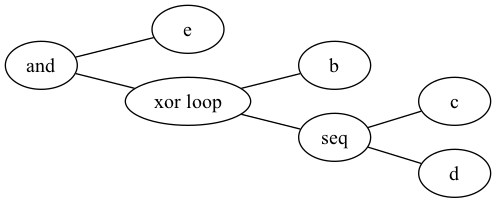

In [78]:
## Parallel Log
log = [('b', 'e'),
       ('b', 'e', 'c', 'd', 'b'),
       ('b', 'c', 'e', 'd', 'b'),
       ('b', 'c', 'd', 'e', 'b'),
       ('e', 'b', 'c', 'd', 'b')]
run(log)

→(a, ↺(∧(b, c), →(e, f)), d)


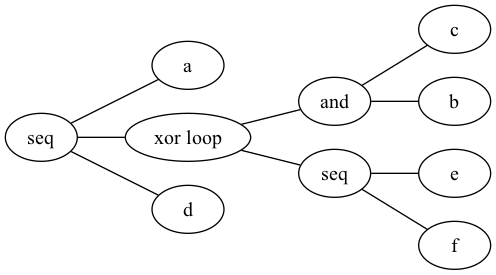

In [79]:
log = [('a', 'b', 'c', 'd'),
       ('a', 'c', 'b', 'd'),
       ('a', 'b', 'c', 'e', 'f', 'b', 'c', 'd'),
       ('a', 'c', 'b', 'e', 'f', 'b', 'c', 'd'),
       ('a', 'b', 'c', 'e', 'f', 'c', 'b', 'd'),
       ('a', 'c', 'b', 'e', 'f', 'b', 'c', 'e', 'f', 'c', 'b', 'd')]
run(log)

↺(∧(b, c), →(e, f))


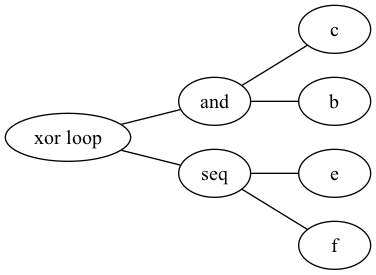

In [80]:
log = [('b', 'c'),
 ('c', 'b'),
 ('b', 'c', 'e', 'f', 'b', 'c'),
 ('c', 'b', 'e', 'f', 'b', 'c'),
 ('b', 'c', 'e', 'f', 'c', 'b'),
 ('c', 'b', 'e', 'f', 'b', 'c', 'e', 'f', 'c', 'b')]
run(log)

Tau Logs

↺(𝜏, a)


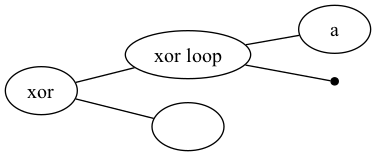

In [81]:
log = [('',), ('a',), ('a', 'a')]
run(log)

↺(𝜏, a, b, c, d)


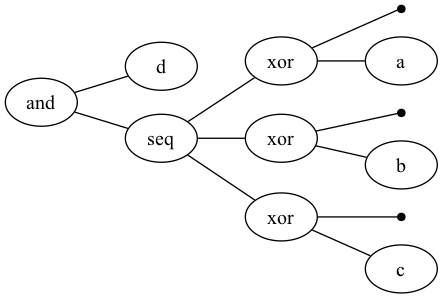

In [82]:
log = [('a', 'b', 'c', 'd'), ('d', 'a', 'b'), ('a', 'd', 'c'), ('b', 'c', 'd',)]
run(log)

### Inductive Miner - Infrequent

In [83]:
%reload_ext autoreload
%autoreload 2

from practical.ProcessMining.group1.task3.inductiveminer_infrequent import InductiveMinerInfrequent

def run_freq(log, threshold):
  miner = InductiveMinerInfrequent(log, threshold)
  miner.run()
  print(miner)
  miner.visualize_process_tree()

In [84]:
log = [('a', 'c', 'd', 'e', 'b'),
       ('a', 'b', 'a', 'e', 'd', 'c'),
       ('a', 'e', 'c', 'b', 'd'),
       ('a', 'd', 'b', 'c', 'e')]

#run_freq(log, 0.3)
miner = InductiveMinerInfrequent(log, 0.3)
miner.run()
print(miner)

↺(𝜏, a, b, c, d, e)


a


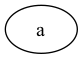

In [85]:
run([('a',), ('a',), ('a',)])

×(a, 𝜏)


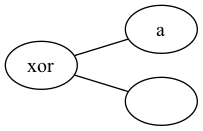

In [86]:
run([('',), ('a',), ('a',)])

↺(a, 𝜏)


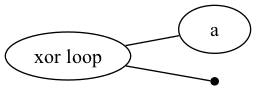

In [87]:
run([('a',), ('a', 'a'), ('a', 'a', 'a')])

↺(𝜏, a)


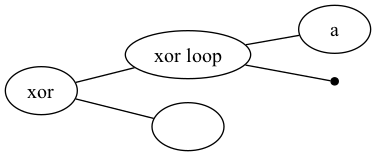

In [88]:
run([('',), ('a',), ('a', 'a')])

# Test with simple event logs

In [89]:
test_logs = read_txt_test_logs("../shared/example_files/simple_event_logs.txt")

### Inductive Miner - Base

L1 [('a', 'b', 'c', 'd'), ('a', 'b', 'c', 'd'), ('a', 'b', 'c', 'd'), ('a', 'c', 'b', 'd'), ('a', 'c', 'b', 'd'), ('a', 'e', 'd')]
→(a, ×(∧(b, c), e), d)


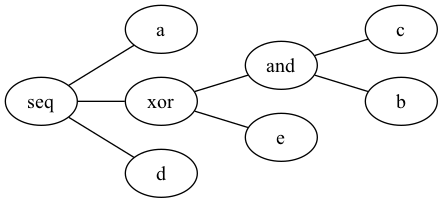

L2 [('a', 'b', 'c', 'd'), ('a', 'b', 'c', 'd'), ('a', 'b', 'c', 'd'), ('b', 'c', 'b', 'd'), ('b', 'c', 'b', 'd'), ('b', 'c', 'b', 'd'), ('b', 'c', 'b', 'd'), ('a', 'b', 'c', 'e', 'f', 'b', 'c', 'd'), ('a', 'b', 'c', 'e', 'f', 'b', 'c', 'd'), ('a', 'b', 'c', 'e', 'f', 'c', 'b', 'd'), ('a', 'c', 'b', 'e', 'f', 'b', 'c', 'd'), ('a', 'c', 'b', 'e', 'f', 'b', 'c', 'd'), ('a', 'c', 'b', 'e', 'f', 'b', 'c', 'e', 'f', 'c', 'b', 'd')]
→(×(a, 𝜏), ↺(∧(b, c), →(e, f)), d)


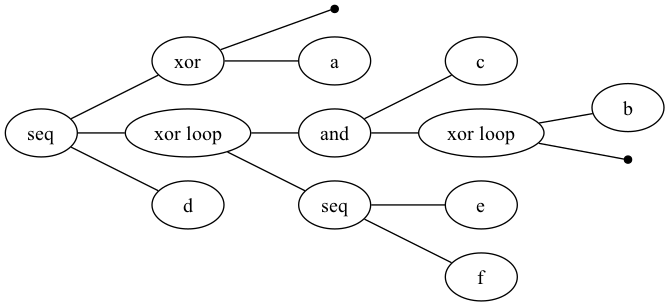

L3 [('a', 'b', 'c', 'd', 'e', 'f', 'b', 'd', 'c', 'e', 'g'), ('a', 'b', 'd', 'c', 'e', 'g'), ('a', 'b', 'd', 'c', 'e', 'g'), ('a', 'b', 'c', 'd', 'e', 'f', 'b', 'c', 'd', 'e', 'f', 'b', 'd', 'c', 'e', 'g')]
→(a, f, ↺(b, e, ∧(d, c)), g)


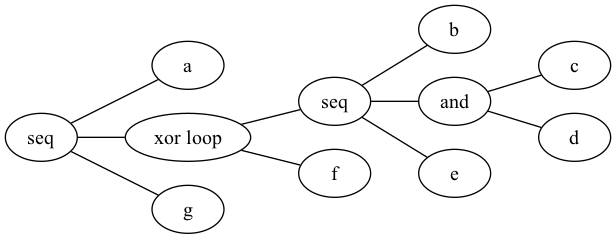

L4 [('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('b', 'c', 'd'), ('b', 'c', 'd'), ('b', 'c', 'd'), ('b', 'c', 'd'), ('b', 'c', 'd'), ('b', 'c', 'd'), ('b', 'c', 'd'), ('b', 'c', 'd'), ('b', 'c', 'd'), ('b', 'c', 'd'), ('b', 'c', 'd'), ('b', 'c', 'd'), ('b', 'c', 'd'), ('b', 'c',

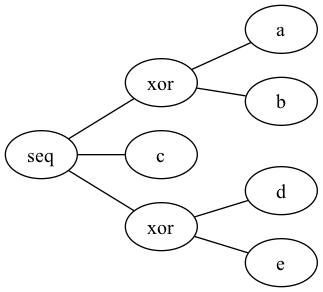

L5 [('a', 'b', 'e', 'f'), ('a', 'b', 'e', 'f'), ('a', 'b', 'e', 'c', 'd', 'b', 'f'), ('a', 'b', 'e', 'c', 'd', 'b', 'f'), ('a', 'b', 'e', 'c', 'd', 'b', 'f'), ('a', 'b', 'c', 'e', 'd', 'b', 'f'), ('a', 'b', 'c', 'e', 'd', 'b', 'f'), ('a', 'b', 'c', 'd', 'e', 'b', 'f'), ('a', 'b', 'c', 'd', 'e', 'b', 'f'), ('a', 'b', 'c', 'd', 'e', 'b', 'f'), ('a', 'b', 'c', 'd', 'e', 'b', 'f'), ('a', 'e', 'b', 'c', 'd', 'b', 'f'), ('a', 'e', 'b', 'c', 'd', 'b', 'f'), ('a', 'e', 'b', 'c', 'd', 'b', 'f')]
→(a, ∧(e, ↺(b, →(c, d))), f)


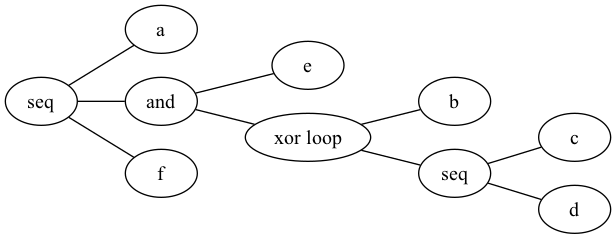

L6 [('a', 'c', 'e', 'g'), ('a', 'c', 'e', 'g'), ('a', 'e', 'c', 'g'), ('a', 'e', 'c', 'g'), ('a', 'e', 'c', 'g'), ('b', 'd', 'f', 'g'), ('b', 'd', 'f', 'g'), ('b', 'f', 'd', 'g'), ('b', 'f', 'd', 'g'), ('b', 'f', 'd', 'g'), ('b', 'f', 'd', 'g')]
→(×(→(a, ∧(e, c)), →(b, ∧(f, d))), g)


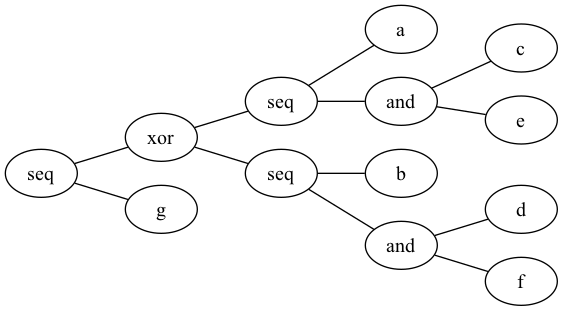

L7 [('a', 'c'), ('a', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'b', 'c'), ('a', 'b', 'b', 'c'), ('a', 'b', 'b', 'b', 'b', 'c')]
→(a, ↺(𝜏, b), c)


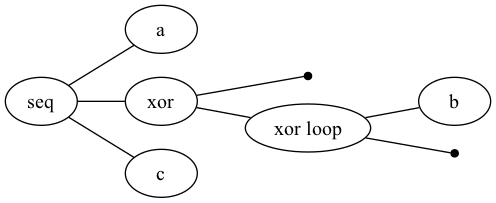

L8 [('a', 'b', 'd'), ('a', 'b', 'd'), ('a', 'b', 'd'), ('a', 'b', 'c', 'b', 'd'), ('a', 'b', 'c', 'b', 'd'), ('a', 'b', 'c', 'b', 'c', 'b', 'd')]
→(a, ↺(𝜏, b, c), d)


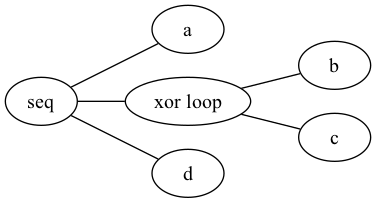

L9 [('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('b', 'c', 'e'), ('b', 'c', 'e'), ('b', 'c', 'e'), ('b', 'c', 'e'), ('b', 'c', 'e'), ('b', 'c', 'e'), ('b', 'c', 'e'), ('b', 'c', 'e'), ('b', 'c', 'e'), ('b', 'c', 'e'), ('b', 'c', 'e'), ('b', 'c', 'e'), ('b', 'c', 'e'), ('b', 'c',

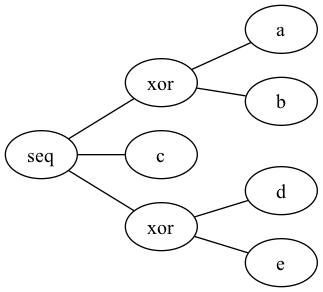

L10 [('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a'), ('a', 'a')]
↺(a, 𝜏)


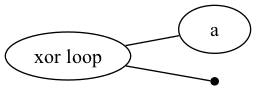

L11 [('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'b', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c'), ('a', 'c')]
→(a, ×(b, 𝜏), c)


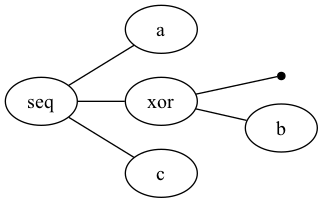

L12 [('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('a', 'c', 'd'), ('b', 'c', 'e'), ('b', 'c', 'e'), ('b', 'c', 'e'), ('b', 'c', 'e'), ('b', 'c', 'e'), ('b', 'c', 'e'), ('b', 'c', 'e'), ('b', 'c', 'e'), ('b', 'c', 'e'), ('b', 'c', 'e'), ('b', 'c', 'e'), ('b', 'c', 'e'), ('b', 'c', 'e'), ('b', 'c'

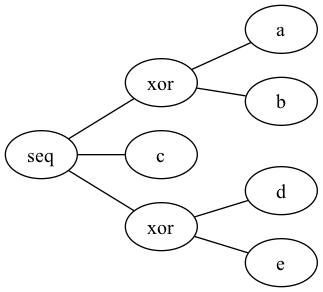

L13 [('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('a', 'c', 'd', 'c'), ('b',

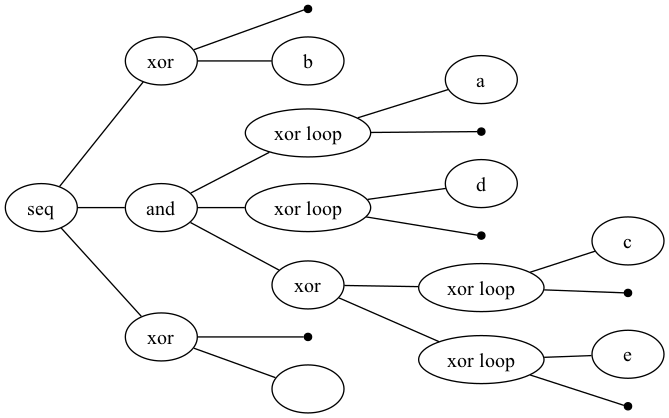

L14 [('c', 'a', 'b', 'd', 'e'), ('c', 'a', 'b', 'd', 'e'), ('c', 'a', 'b', 'e', 'd'), ('c', 'a', 'b', 'e', 'd'), ('c', 'a', 'b', 'e', 'd'), ('a', 'b', 'e', 'd'), ('a', 'b', 'e', 'd')]
→(×(c, 𝜏), a, b, ∧(d, e))


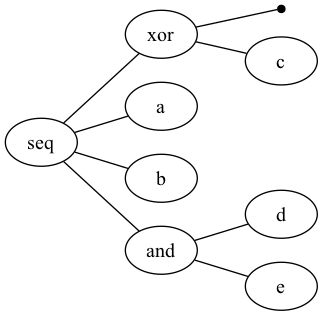

In [90]:
for key in test_logs.keys():
    print(key, test_logs[key])
    run(test_logs[key])

### Inductive Miner - Infrequent

→(a, ×(∧(b, c), e), d)


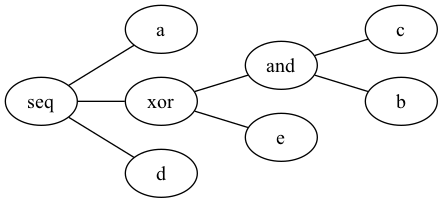

→(×(a, 𝜏), ↺(∧(b, c), →(e, f)), d)


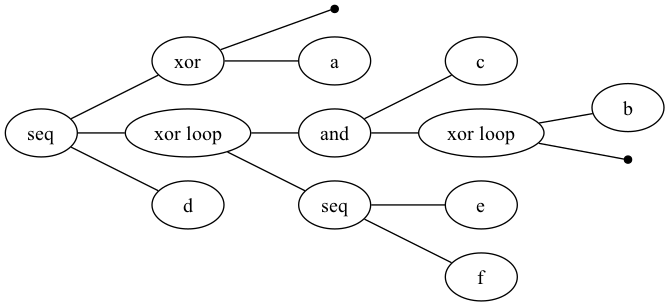

→(a, f, ↺(b, e, ∧(d, c)), g)


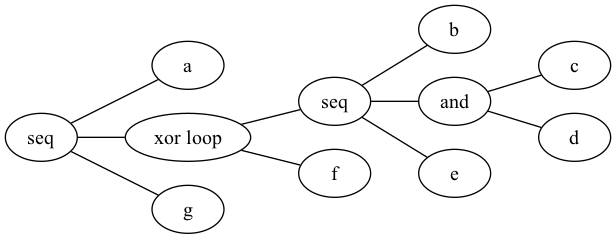

→(×(a, b), c, ×(d, e))


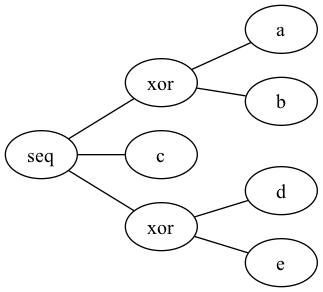

→(a, ∧(e, ↺(b, →(c, d))), f)


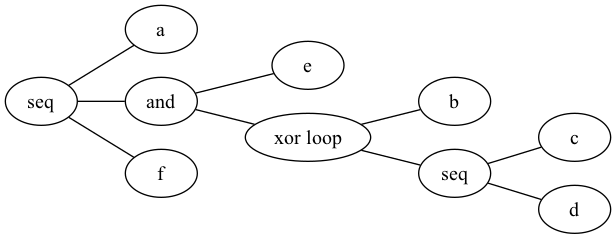

→(×(→(a, ∧(e, c)), →(b, ∧(f, d))), g)


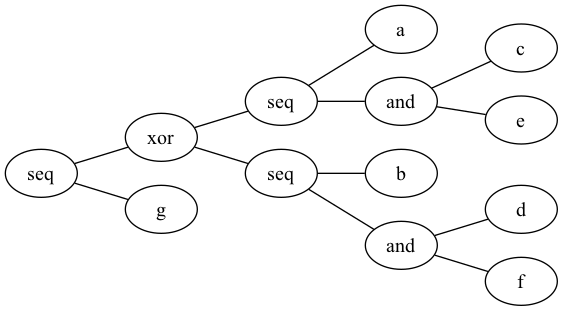

→(a, ↺(𝜏, b), c)


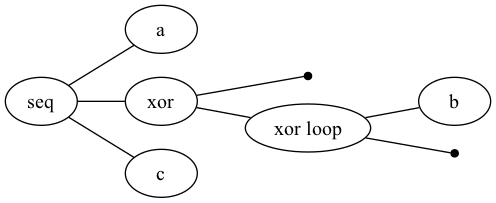

→(a, ↺(𝜏, b, c), d)


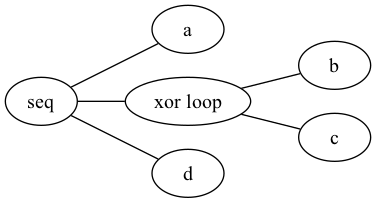

→(×(a, b), c, ×(d, e))


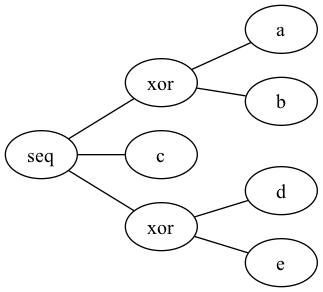

↺(a, 𝜏)


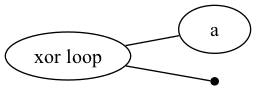

→(a, ×(b, 𝜏), c)


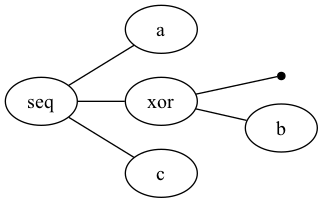

→(×(a, b), c, ×(d, e))


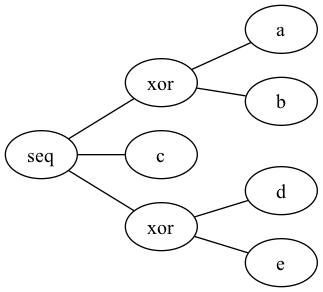

↺(𝜏, )→↺(𝜏, )(↺(𝜏, )×↺(𝜏, )(↺(𝜏, )b↺(𝜏, ),↺(𝜏, ) ↺(𝜏, )𝜏↺(𝜏, ))↺(𝜏, ),↺(𝜏, ) ↺(𝜏, )↺↺(𝜏, )(↺(𝜏, )𝜏↺(𝜏, ),↺(𝜏, ) ↺(𝜏, )a↺(𝜏, ),↺(𝜏, ) ↺(𝜏, )c↺(𝜏, ),↺(𝜏, ) ↺(𝜏, )d↺(𝜏, ),↺(𝜏, ) ↺(𝜏, )e↺(𝜏, ))↺(𝜏, ),↺(𝜏, ) ↺(𝜏, ))↺(𝜏, )


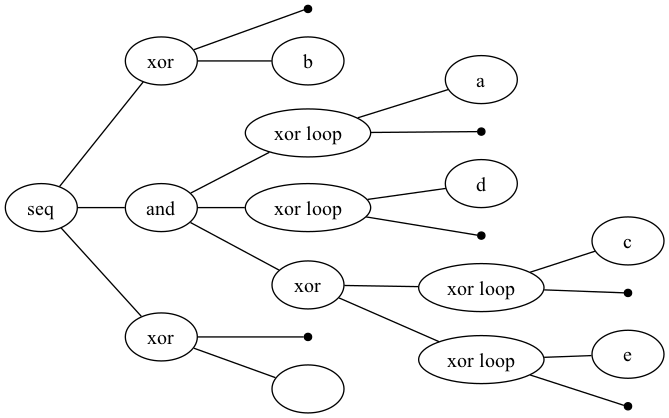

→(×(c, 𝜏), a, b, ∧(d, e))


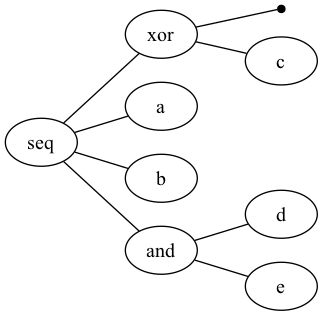

In [91]:
for key in test_logs.keys():
    print(key, test_logs[key])
    run_infrequent(test_logs[key])